# Explore here

In [18]:
import os
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Environment variables
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


spotify = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

# URI (Uniform Resource Identifier) is a string of characters that identifies a resource on the network
''' https://open.spotify.com/artist/14pVkFUHDL207LzLHtSA18'''
pantera_uri = 'spotify:artist:14pVkFUHDL207LzLHtSA18'

# Get Spotify catalog information about an artist’s top 10 tracks by country.
results = spotify.artist_top_tracks(pantera_uri)
tracks = results["tracks"]

# Save 10 songs in a dictionary{name,duration,popularity}
tracks_info = {
    'Name' : [i['name'] for i in tracks],

    'Duration_min': [round((i['duration_ms'])/60000, 3) for i in tracks],
    
    'Popularity': [i['popularity'] for i in tracks]
}


# Transform to Pandas DataFrame and print top 3 songs
df = pd.DataFrame(tracks_info)

# Sort and print the top 3 songs
df_sorted = df.sort_values(by="Popularity", ascending=False)

top_3 = df_sorted.head(3)

print(top_3)




                Name  Duration_min  Popularity
0               Walk         5.252          74
1  Cowboys from Hell         4.059          72
2     Cemetery Gates         7.049          66


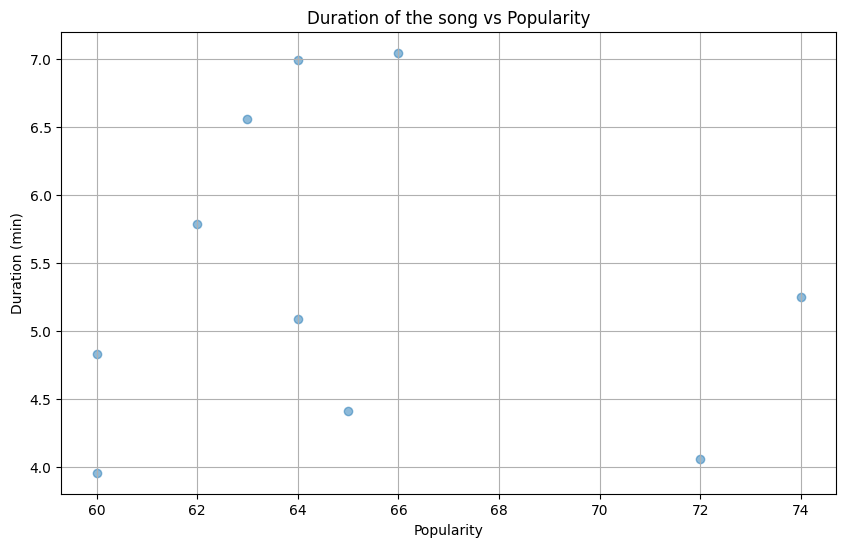

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["Popularity"], df["Duration_min"], alpha=0.5)
plt.title('Duration of the song vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Duration (min)')
plt.grid(True)
plt.show()

# Analysis

Does duration have a relationship with popularity?

- There seems to be no relationship between song length and popularity. The most popular songs are not necessarily the most popular.


Could we say that a song that lasts a short time may be more popular than a song that lasts longer?
- There is nothing to indicate that there is a direct relationship between the popularity and the duration of the songs.